# Chapter 3

In [2]:
library(MASS)
library(ISLR)

### 3.3.3 Potential Problems: Collinearity

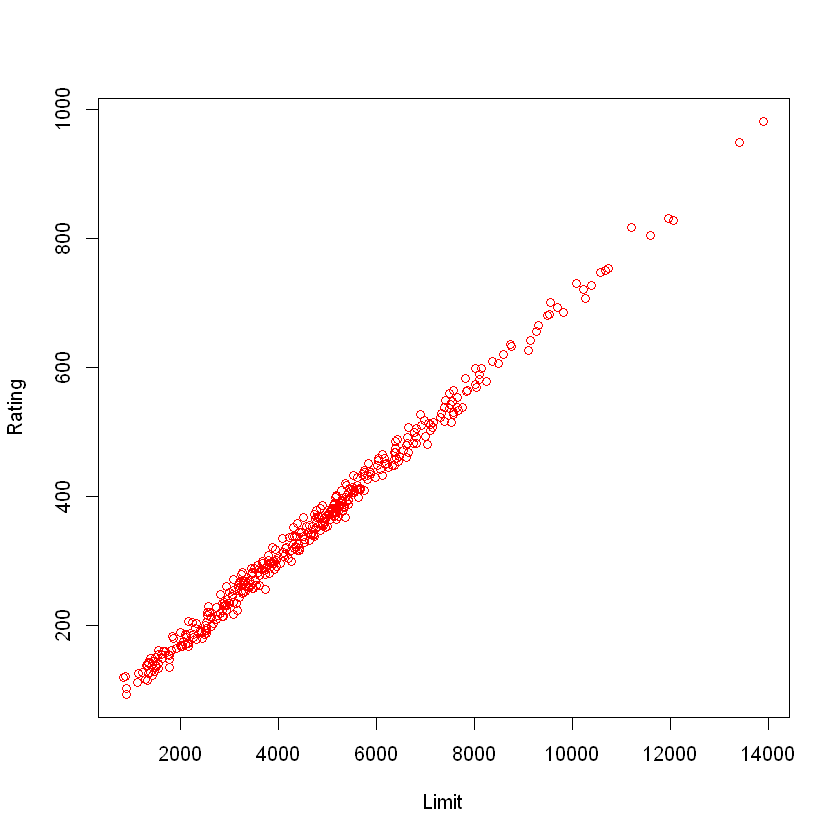

In [3]:
plot(Credit$Limit, Credit$Rating, xlab="Limit", ylab="Rating", col="red")

### 3.6.2 Simple Linear Regression
We fit a linear model using the Boston dataset, from the 'MASS' package, with mdev data as response and lstat data as predictor. The variable lstat represents the lower status of the population (percent) and mdev represents the median value of owner-occupied homes in $1000s.  

In [4]:
attach(Boston) 
fit1 <- lm(medv ~ lstat) 
summary(fit1)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [5]:
confint(fit, parm = "lstat", level = 0.9) # 95 % = (1 - level) / 2 and 1 - (1 - level) / 2

ERROR: Error in confint(fit, parm = "lstat", level = 0.9): oggetto "fit" non trovato


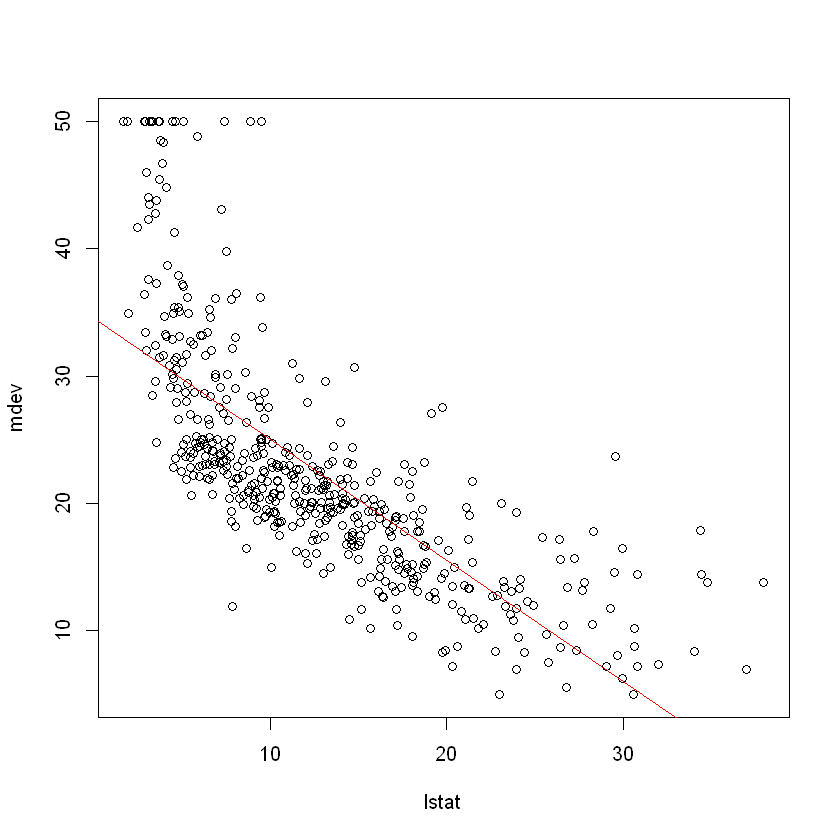

In [6]:
plot(lstat, medv, xlab="lstat", ylab="mdev")
abline(fit1, col = "red") # plot the fitted linear model

A residual is the difference between an observed response value and a predicted response value, predicted by the linear model. We can plot the residuals of our predicted variable, i.e. medv. We can observe some non-linearity effect for lstat < 5 and lstat > 25. 

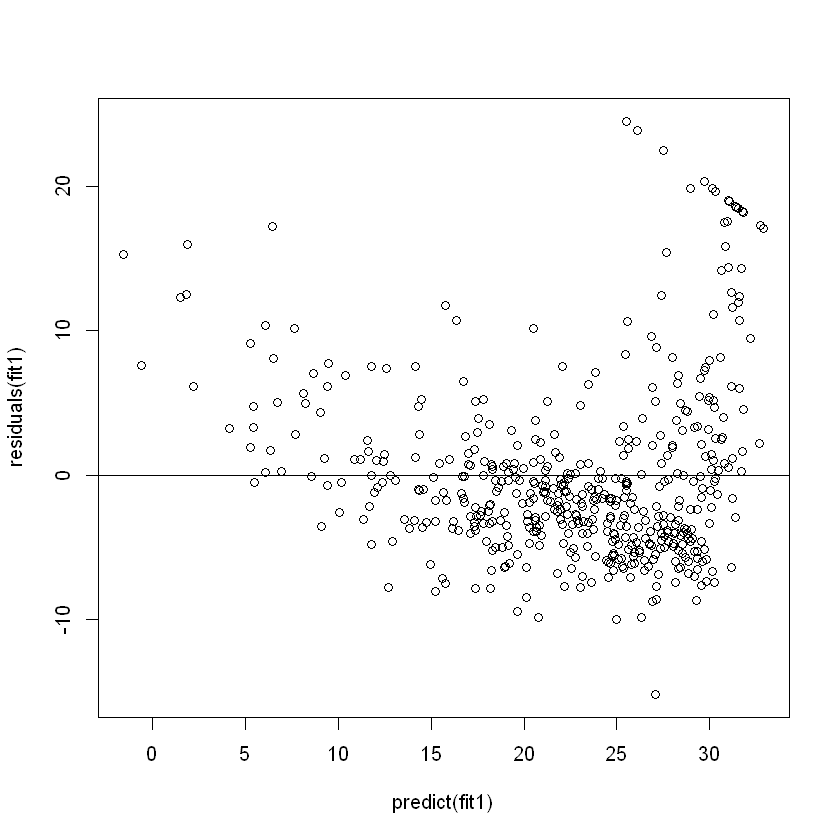

In [7]:
plot(predict(fit1), residuals(fit1)) 
abline(0, 0)

### 3.6.3 Multiple Linear Regression
We add more predictors to our linear model for mdev, e.g. 'age'.

In [8]:
fit2 <- lm(medv ~ lstat + age, data = Boston)
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


### 3.6.4 Interaction terms

In [9]:
fit3 <- lm(medv ~ lstat * age, data = Boston) # adds lstat, age and the interactions terms lstat x age
summary(fit3)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


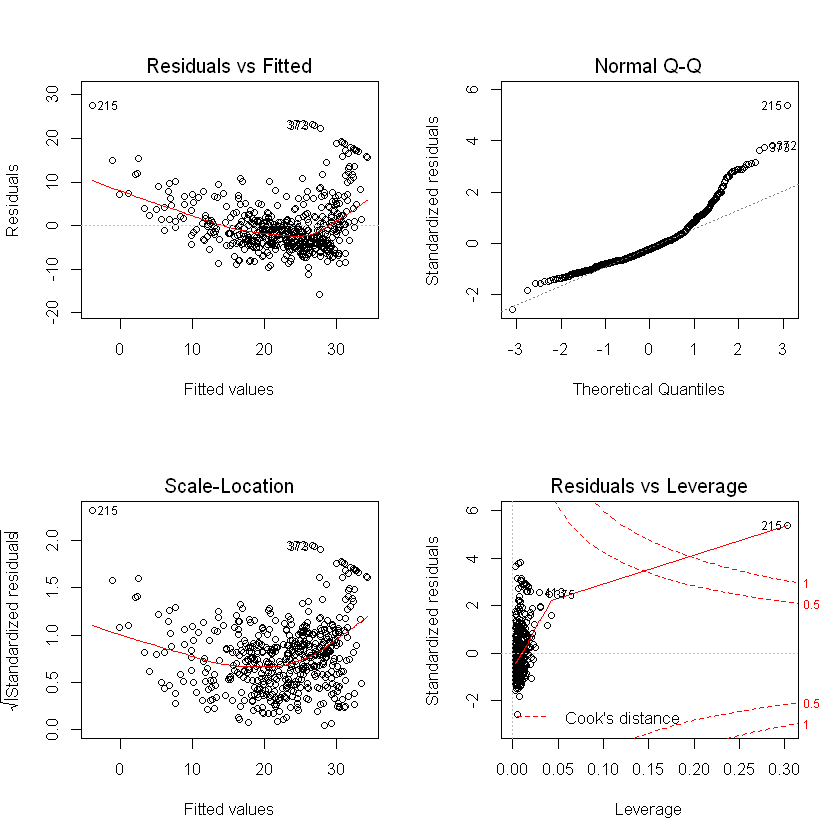

In [10]:
par(mfrow = c(2,2))
plot(fit3)

In [11]:
beta_lstat <- fit3$coefficients['lstat']
beta_age <- fit3$coefficients['age']
beta_interaction <- fit3$coefficients['lstat:age']
mdev_hat <- beta_lstat * lstat + beta_age * age + beta_interaction * lstat * age

In [12]:
anova(fit2, fit3) # ANalysis Of VAriance: RSS is the Residual Sum of Squares  

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
503,19168.13,NA,NA,NA,NA
502,18977.72,1,190.4125,5.036805,0.02524911


### 3.6.5 Polynomial fit

In [13]:
fit4 <- lm(medv ~ poly(lstat,2))
summary(fit4)


Call:
lm(formula = medv ~ poly(lstat, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2456   91.76   <2e-16 ***
poly(lstat, 2)1 -152.4595     5.5237  -27.60   <2e-16 ***
poly(lstat, 2)2   64.2272     5.5237   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


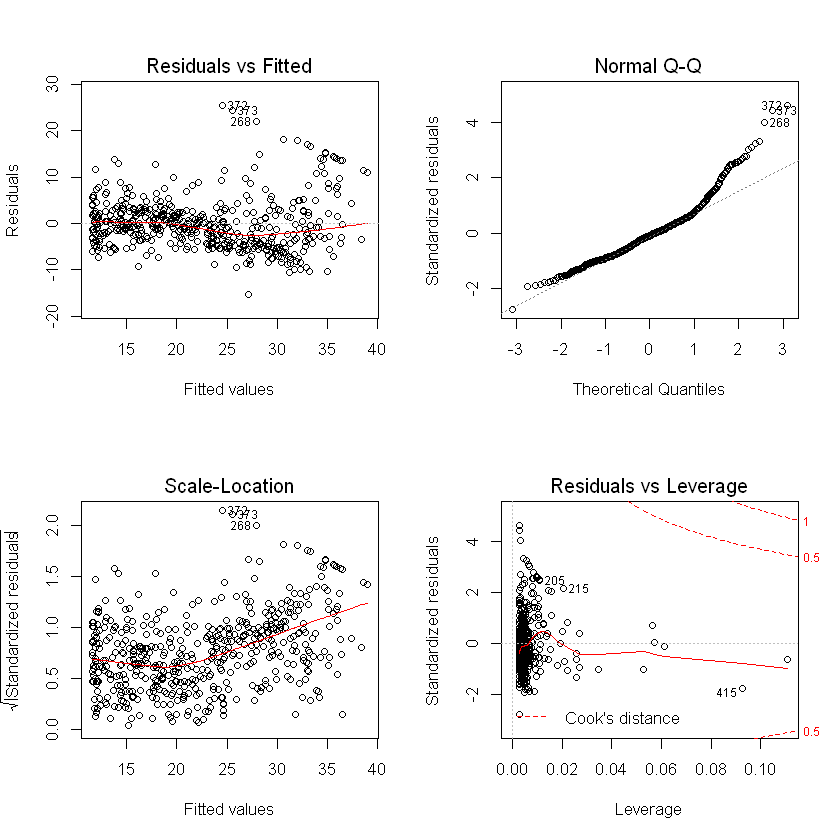

In [14]:
par(mfrow = c(2,2)) # divides the plotting region into a 2 × 2 grid of panels
plot(fit4)

### 3.6.6 Qualitative Predictors
Given a qualitative variable R generates dummy variables automatically. For each value of a qualitative variable R creates a dummy variable that can take for example value 0 or 1. The linear regression fit computes the parameters for these additional variables.

In [15]:
fit <- lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)
summary(fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [16]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1
